In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


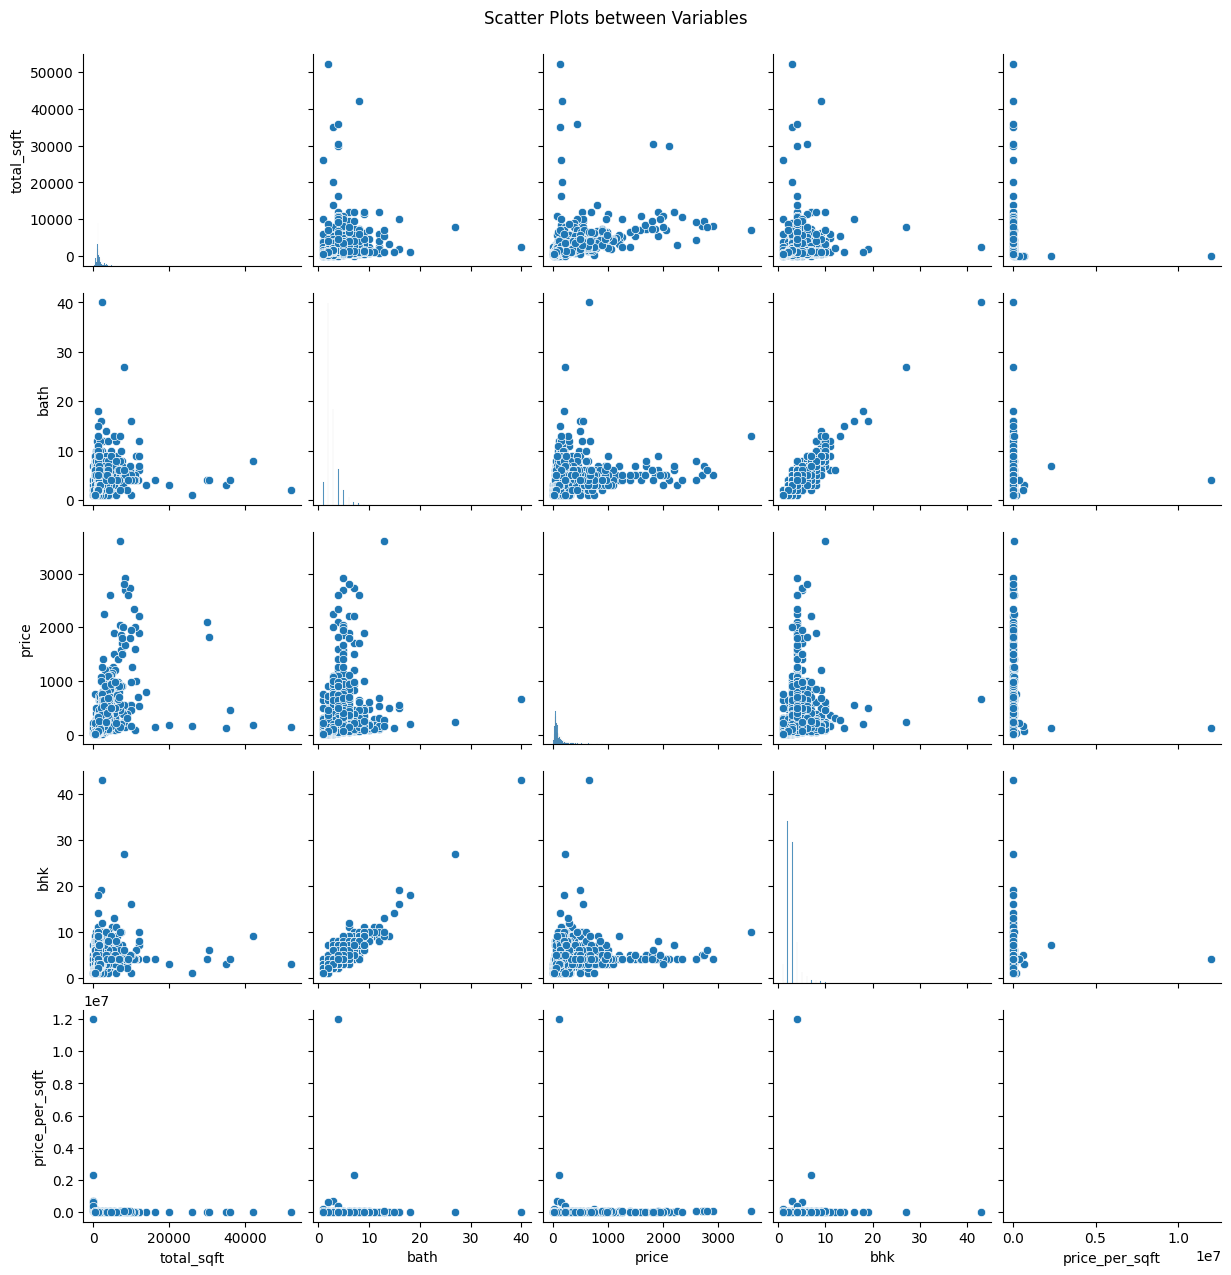

In [ ]:
# Scatter plots to check correlations between variables
# Create a pair plot for all numerical columns
sns.pairplot(df)
plt.suptitle('Scatter Plots between Variables', y=1.02)
plt.show()


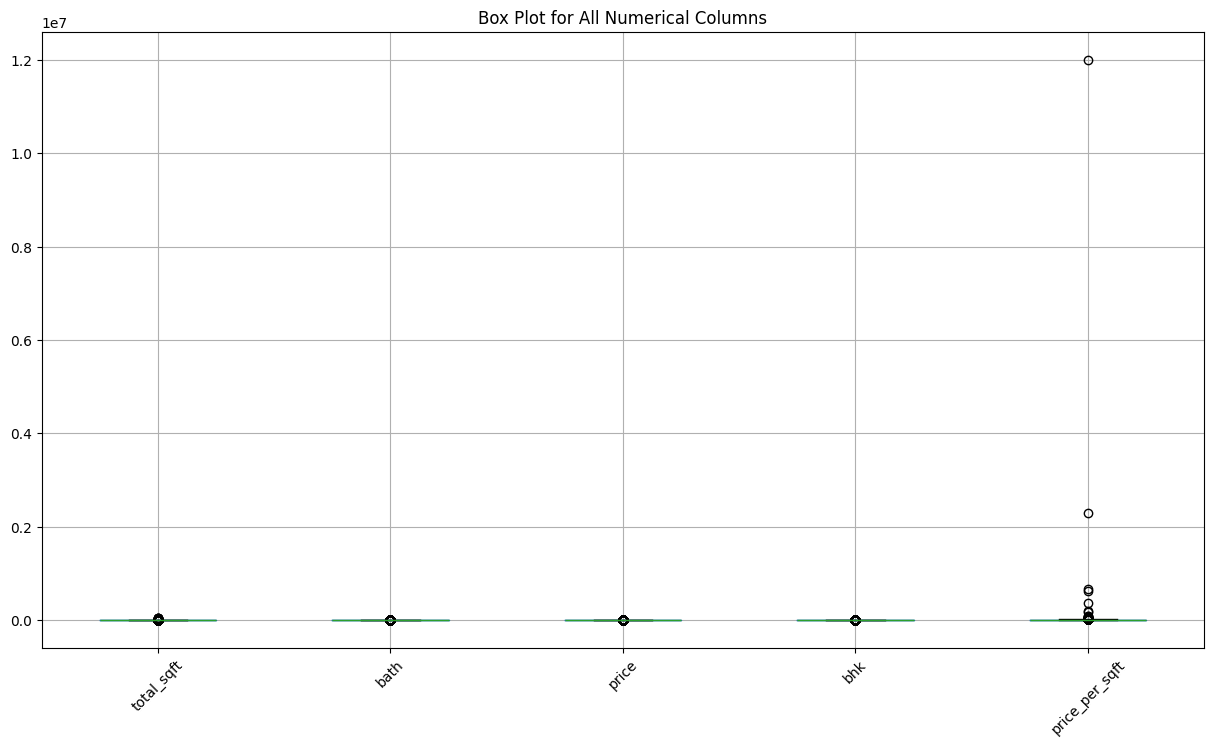

In [ ]:
# Box plot for all numerical columns
plt.figure(figsize=(15, 8))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot for All Numerical Columns')
plt.show()

## TO DETECT OUTLIERS

C:\Users\Admin\AppData\Local\Temp\ipykernel_9508\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

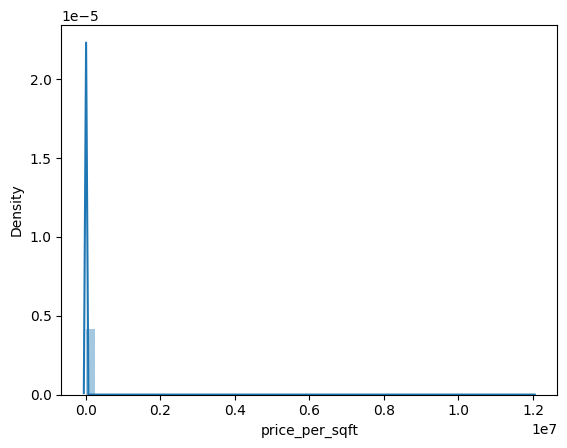

In [ ]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

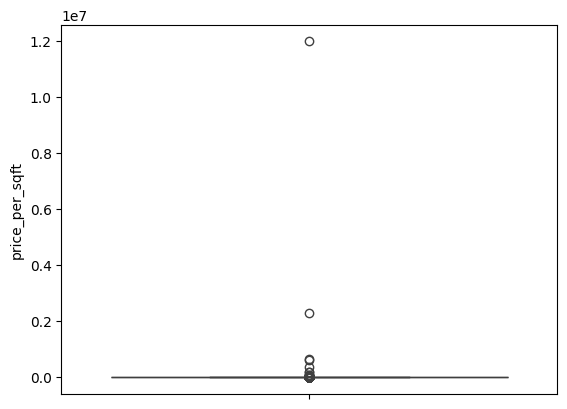

In [ ]:
sns.boxplot(df['price_per_sqft'])

## TO REMOVE OUTLIERS

### Method 1. Mean function

In [ ]:
mean = df.price_per_sqft.mean()
mean

7920.336742424242

### Method 2. Percentile

In [ ]:
# Define lower and upper percentile
lower_percentile = 0.05
upper_percentile = 0.95
#calculate the value corresponding to these percentiles
lower_limit = df['price_per_sqft'].quantile(0.01)
upper_limit = df['price_per_sqft'].quantile(0.99)
print("The upper limit is",upper_limit,"and the lower limit is",lower_limit)

The upper limit is 23674.45000000001 and the lower limit is 2549.0


In [ ]:
# Filter the data by removing outliers
df_new = df[(df['price_per_sqft']>=lower_limit) &(df['price_per_sqft']<=upper_limit)]
print("New data has only",len(df_new),"values and old data frame has",len(df),"values")

New data has only 12941 values and old data frame has 13200 values


In [ ]:
# print outliers
outliers1 = df[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]
print(outliers1)

              location       size  total_sqft  bath   price  bhk  \
9                other  6 Bedroom      1020.0   6.0   370.0    6   
20             Kengeri      1 BHK       600.0   1.0    15.0    1   
45          HSR Layout  8 Bedroom       600.0   9.0   200.0    8   
130    Electronic City      2 BHK       880.0   1.0    16.5    2   
169           Attibele      1 BHK       450.0   1.0    11.0    1   
...                ...        ...         ...   ...     ...  ...   
13081            other  6 Bedroom      8000.0   6.0  2800.0    6   
13094            other  4 Bedroom      1200.0   5.0   325.0    4   
13127            other  4 Bedroom      1200.0   5.0   325.0    4   
13185         Hulimavu      1 BHK       500.0   1.0   220.0    1   
13186            other  4 Bedroom      1200.0   5.0   325.0    4   

       price_per_sqft  
9               36274  
20               2500  
45              33333  
130              1875  
169              2444  
...               ...  
13081          

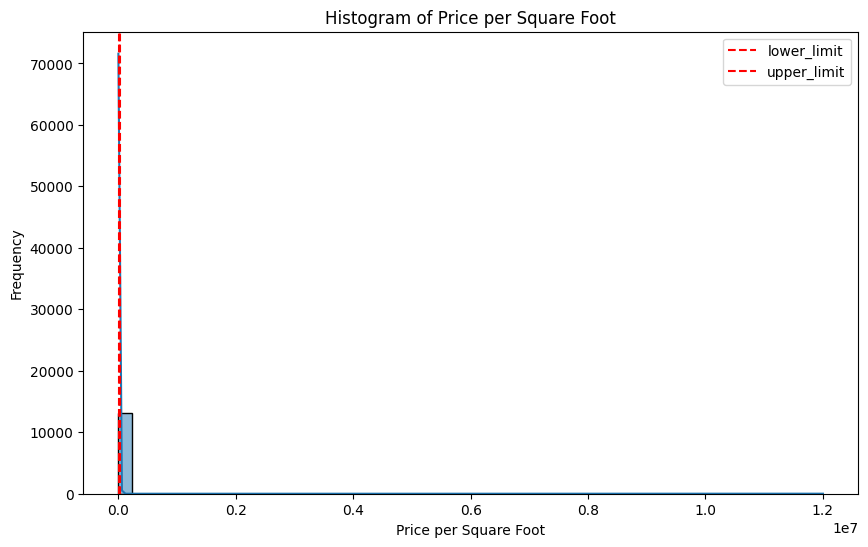

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.axvline(lower_limit, color='r', linestyle='--', label='lower_limit')
plt.axvline(upper_limit, color='r', linestyle='--', label='upper_limit')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Square Foot')
plt.legend()
plt.show()

### Method3.Inter Quartile Range Method

In [ ]:
# calculate Q1(25th quartile) and Q3 (75th quartile)
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)
print("25th quartile(Q1)is",Q1,"and 75th quartile (Q3) is",Q3)

25th quartile(Q1)is 4267.0 and 75th quartile (Q3) is 7317.0


In [ ]:
# calculate IQR
IQR = Q3-Q1
print("The inter quartile range is",IQR)

The inter quartile range is 3050.0


In [ ]:
# Defining upper and lower limits
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 - 1.5*IQR
print("The lower limit is",lower_limit ,"and Upper limit is",upper_limit)

The lower limit is -308.0 and Upper limit is 2742.0


In [ ]:
# Filtering the data to remove outliers
New_df = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]
print(len(New_df),"&",len(df))

230 & 13200


In [ ]:
# To display the outliers
outliers2 = df[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]
outliers2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


### Method 4. Normal distribution

In [ ]:
# Calculte mean and std
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
print("The mean and standard deviation of the data frames are",mean,"&",std,"respectively.")

The mean and standard deviation of the data frames are 7920.336742424242 & 106727.16032810867 respectively.


In [ ]:
# To find the lower and upper limit
No_of_std = 3
lower=mean-3*std
upper=mean+3*std
print("upper limit:",upper,"& lower limit:",lower)

upper limit: 328101.8177267502 & lower limit: -312261.14424190175


In [ ]:
# Filter dataframe to remove outliers
new_data = df[(df['price_per_sqft']>=lower) & (df['price_per_sqft']<=upper)]
print(len(new_data))
print(len(df))

13195
13200


In [ ]:
outlier3= df[(df['price_per_sqft'] < lower) | (df['price_per_sqft'] > upper)]
print(outlier3)

             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333


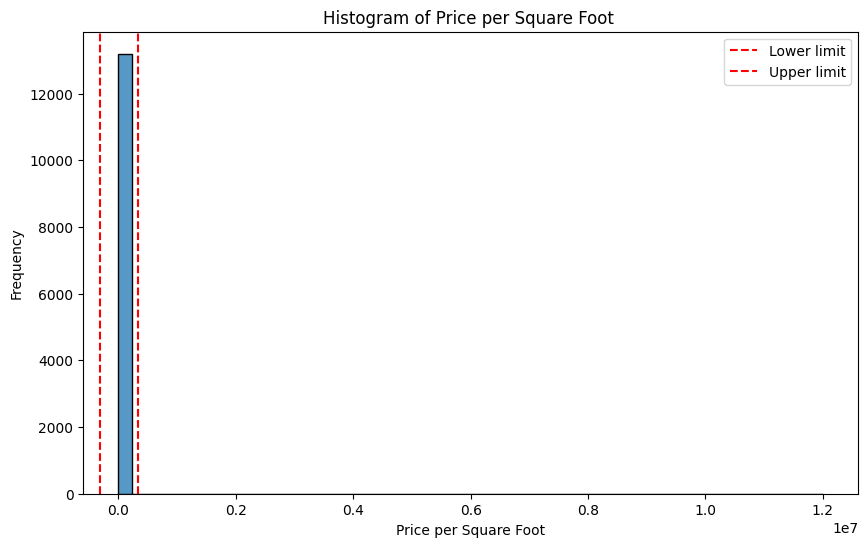

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=50)
plt.axvline(lower, color='r', linestyle='--', label='Lower limit')
plt.axvline(upper, color='r', linestyle='--', label='Upper limit')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Square Foot ')
plt.legend()
plt.show()

<Axes: ylabel='price_per_sqft'>

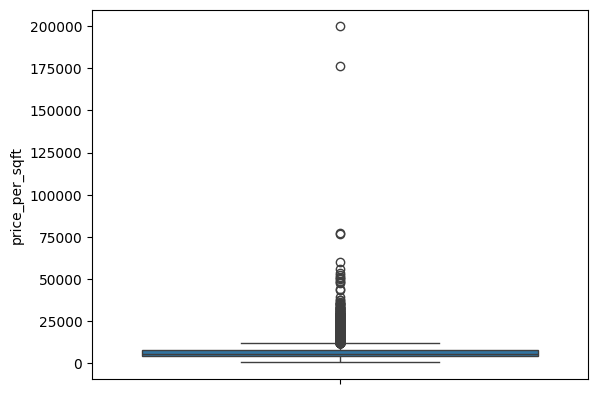

In [ ]:
sns.boxplot(new_data['price_per_sqft'])

### Method 5. Z score


In [ ]:
# Finding the limits
upper_limit = df['price_per_sqft'].mean()+3*df['price_per_sqft'].std()
lower_limit = df['price_per_sqft'].mean()-3*df['price_per_sqft'].std()
print("Upper limit is",upper_limit, "and the Lower limit is",lower_limit)

Upper limit is 328101.8177267502 and the Lower limit is -312261.14424190175


In [ ]:
#finding the outliers
df.loc[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [ ]:
# Deleting outliers
new_df = df.loc[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

# Print the lengths to verify
print(len(new_df))
print(len(df))


13195
13200


In [ ]:
# Outliers
outliers2 = df.loc[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]

# Printing the outliers
print(outliers2)


              location       size  total_sqft  bath   price  bhk  \
9                other  6 Bedroom      1020.0   6.0   370.0    6   
20             Kengeri      1 BHK       600.0   1.0    15.0    1   
45          HSR Layout  8 Bedroom       600.0   9.0   200.0    8   
130    Electronic City      2 BHK       880.0   1.0    16.5    2   
169           Attibele      1 BHK       450.0   1.0    11.0    1   
...                ...        ...         ...   ...     ...  ...   
13081            other  6 Bedroom      8000.0   6.0  2800.0    6   
13094            other  4 Bedroom      1200.0   5.0   325.0    4   
13127            other  4 Bedroom      1200.0   5.0   325.0    4   
13185         Hulimavu      1 BHK       500.0   1.0   220.0    1   
13186            other  4 Bedroom      1200.0   5.0   325.0    4   

       price_per_sqft  
9               36274  
20               2500  
45              33333  
130              1875  
169              2444  
...               ...  
13081          

<Axes: ylabel='price_per_sqft'>

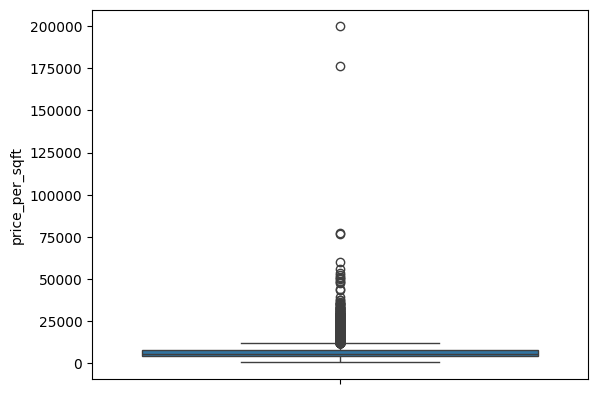

In [ ]:
sns.boxplot(new_df['price_per_sqft'])